<p>Imports</p>

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import calendar
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<p>Read and merge 12 CSV files</p>

In [2]:
path = r"C:\Users\Janice\Desktop\Coding\Projects\Jupyter Notebook\Notes\Keith Galli\Solving real world data science tasks with Python Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

csv_files = glob.glob(os.path.join(path, "*.csv"))

df = (pd.read_csv(f) for f in csv_files)

sales_data = pd.concat(df, ignore_index=True)

<p>Which month had the highest revenue?</p>

In [3]:
formatted_dates = pd.to_datetime(sales_data["Order Date"], format="%m/%d/%y %H:%M", errors="coerce")
sales_data["month"] = pd.DatetimeIndex(formatted_dates).month
sales_data["hour"] = formatted_dates.dt.strftime("%H00")
sales_data.dropna(inplace=True)
sales_data.reset_index(inplace=True, drop=True)

In [4]:
sales_data[["Price Each", "Quantity Ordered"]] = sales_data[["Price Each", "Quantity Ordered"]].apply(pd.to_numeric)

sales_data["revenue"] = sales_data["Price Each"] * sales_data["Quantity Ordered"]

prices_df = sales_data[["month", "revenue"]]

sorted_df = prices_df.groupby(["month"]).sum()

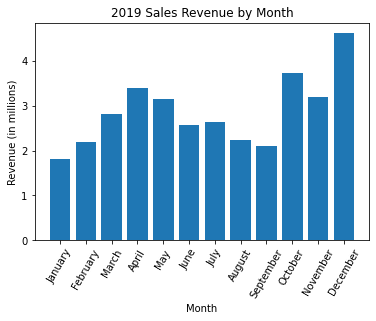

In [5]:
fig, ax = plt.subplots()
ax.bar(sorted_df.index, sorted_df["revenue"])
ax.set_xticks(range(1,13))
ax.set_xticklabels(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   ha="center",
                   rotation=60)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
ax.set_xlabel("Month")
ax.set_ylabel("Revenue (in millions)")
ax.set_title("2019 Sales Revenue by Month")
plt.show()

<p>Which city had the highest revenue?</p>

In [6]:
formatted_addresses = []
for address in sales_data["Purchase Address"]:
    formatted_addresses.append(address.split(",")[1].strip())

sales_data["City"] = formatted_addresses

In [7]:
city_df = sales_data[["revenue", "City"]]
grouped_city_df = city_df.groupby("City").sum()

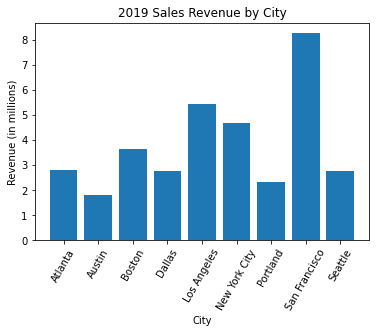

In [8]:
fig, ax = plt.subplots()
ax.bar(grouped_city_df.index, grouped_city_df["revenue"])
ax.set_xticks(range(9))
ax.set_xticklabels(labels=grouped_city_df.index,
                   ha="center",
                   rotation=60)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
ax.set_xlabel("City")
ax.set_ylabel("Revenue (in millions)")
ax.set_title("2019 Sales Revenue by City")
plt.show()

In [9]:
grouped_city_df

,revenue
City,
Atlanta,2.795499e+06
Austin,1.819582e+06
Boston,3.661642e+06
Dallas,2.767975e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Portland,2.320491e+06
San Francisco,8.262204e+06
Seattle,2.747755e+06


<p>What time should we display advertisements to maximize the likelihood of purchases?</p>

In [10]:
hour_df = sales_data[["revenue", "hour"]].groupby("hour").sum()

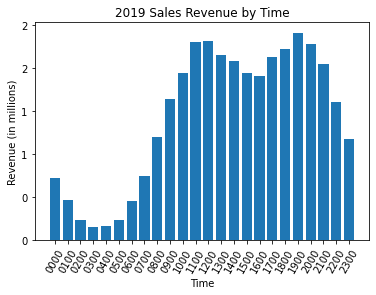

In [11]:
fig, ax = plt.subplots()
ax.bar(hour_df.index, hour_df["revenue"])
ax.set_xticks(range(24))
ax.set_xticklabels(labels=hour_df.index,
                   ha="center",
                   rotation=60)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
ax.set_xlabel("Time")
ax.set_ylabel("Revenue (in millions)")
ax.set_title("2019 Sales Revenue by Time")
plt.show()

In [12]:
night = hour_df.revenue[19:].sum() + hour_df.revenue[:5].sum()
morning = hour_df.revenue[5:13].sum()
afternoon = hour_df.revenue[13:18].sum()

time_df = pd.DataFrame(index=["Morning","Afternoon","Night"],
                       data={"revenue": [morning, afternoon, night]})

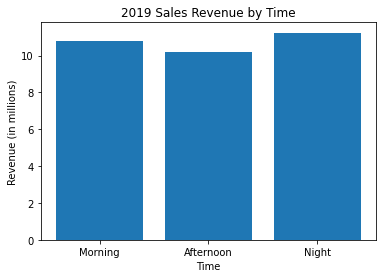

In [13]:
fig, ax = plt.subplots()
ax.bar(time_df.index, time_df["revenue"])
ax.set_xticks(range(3))
ax.set_xticklabels(labels=time_df.index,
                   ha="center")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
ax.set_xlabel("Time")
ax.set_ylabel("Revenue (in millions)")
ax.set_title("2019 Sales Revenue by Time")
plt.show()

<p>What products are most often sold together?</p>

In [14]:
product_df = sales_data[["Order ID", "Product"]] \
            .sort_values("Order ID")
product_df = product_df[product_df.duplicated(subset=["Order ID"], keep=False)] \
            .reset_index(drop=True)

In [15]:
grouped_product_df = pd.DataFrame(columns=["Order ID", "Product"])
grouped_product_df["Order ID"] = product_df["Order ID"].drop_duplicates().reset_index(drop=True)

In [16]:
grouped_product_df["Product"] = product_df.sort_values(["Order ID", "Product"]) \
                                          .groupby(["Order ID"])["Product"] \
                                          .transform(lambda x: ",".join(x))

In [17]:
top_sellers_df = grouped_product_df.groupby("Product") \
                                   .nunique() \
                                   .sort_values("Order ID", ascending=False) \
                                   .head(6)

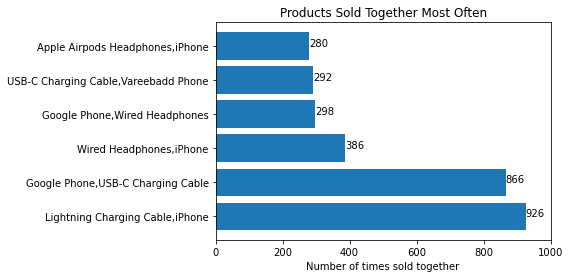

In [18]:
plt.figure()
plt.barh(top_sellers_df.index, top_sellers_df["Order ID"])
plt.title("Products Sold Together Most Often")
plt.xlabel("Number of times sold together")
plt.xticks(range(0, 1001, 200))
for index, value in enumerate(top_sellers_df["Order ID"]):
    plt.text(value, index,str(value))
plt.show()

<p>What product sold the most? Why do you think it did?</p>

In [19]:
sales_vol_df = sales_data[["Product", "Quantity Ordered"]]
top_10_df = sales_vol_df.groupby("Product") \
                        .sum() \
                        .sort_values("Quantity Ordered", ascending=False) \
                        .head(10)

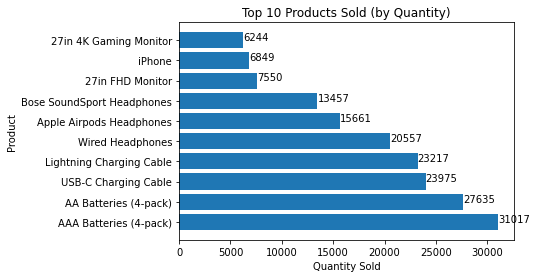

In [20]:
plt.figure()
plt.barh(top_10_df.index, top_10_df["Quantity Ordered"])
plt.title("Top 10 Products Sold (by Quantity)")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
for index, value in enumerate(top_10_df["Quantity Ordered"]):
    plt.text(value, index,str(value))
plt.show()